In [1]:
import pandas as pd
from lightgbm import LGBMRegressor
import lightgbm
import seaborn as sns

In [2]:
df = pd.read_csv('palm_ffb.csv')
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [3]:
df_x = df[["SoilMoisture","Average_Temp","Min_Temp","Max_Temp",
           "Precipitation","Working_days","HA_Harvested"]]
df_y = df['FFB_Yield']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

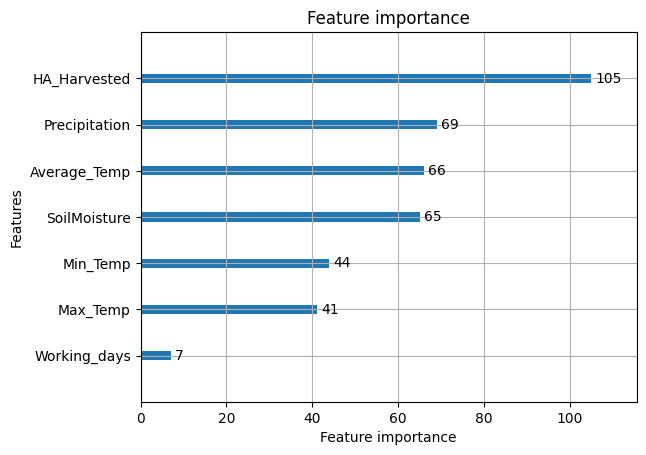

In [4]:
lgb = LGBMRegressor(objective='regression')
lgb.fit(df_x, df_y)
lgb.booster_.feature_importance()
lightgbm.plot_importance(lgb)

The graph above represents the ranking of external factors effecting the FFB yield.<br>
HA_Harvested seems to influence FFB yield the most and is expected because FFB is formulated from HA_Harvested <br>
By right, the yield should not fluctuate alot because FFB_yield is an average of Tonnes/Hectare. <br>
A simple hypothesis is that the FFB are unevenly growing in each hectare. <br>
For further analysis, HA_Harvested is removed from the analysis

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

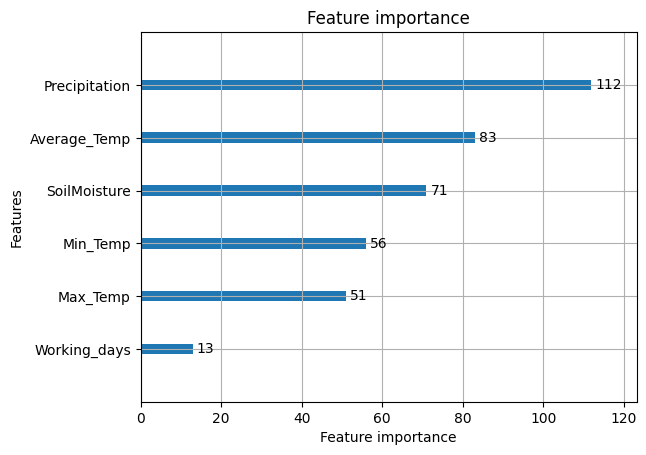

In [5]:
df_x = df[["SoilMoisture","Average_Temp","Min_Temp","Max_Temp",
           "Precipitation","Working_days"]]
df_y = df['FFB_Yield']

lgb = LGBMRegressor(objective='regression')
lgb.fit(df_x, df_y)
lgb.booster_.feature_importance()
lightgbm.plot_importance(lgb)

The new ranking shows that Precipitation, Average_Temp and SoilMoisture are the 3 most important factors for FFB yield <br>
A correlation study will be conduct to study the relationshipb etween the 3 external factors

<AxesSubplot:>

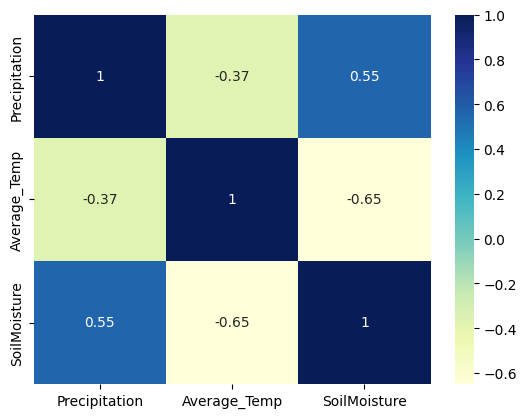

In [6]:
sns.heatmap(df[["Precipitation","Average_Temp","SoilMoisture"]].corr(), annot=True, cmap="YlGnBu")

Precipitation is approximately 35% & 57% more important than Average_Temp and SoilMoisture respectively. <br>
This is an indication that the oil palm tree favours rain which results in higher SoilMoisture with a correlation score of 0.55 
<br>
With the cooling affect from rain the temperature also lowers. (-0.37 correlation) <br>
With a lower temperature, the soil retains the water providing higher SoilMoisture. (-0.65 correlation) <br>
All these analysis indiciates that watering the oil palm tree are of utmost importance. <br>
Just by watering the plants, we can fulfill 3 of the most important external factors affecting FFB yield. <br>